[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

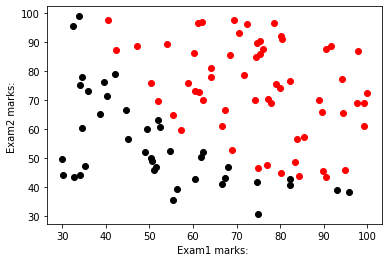

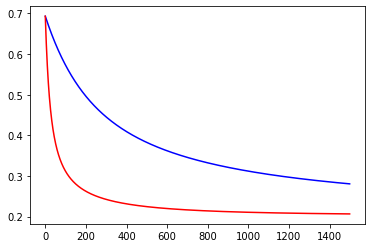

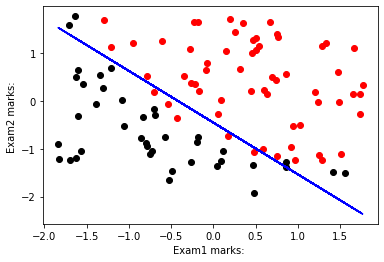

In [104]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
%matplotlib inline
data=np.loadtxt('ex2data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]
def plotData(X,y):
    fig=pyplot.figure()
    pos=y==1
    neg=y==0
    pyplot.plot(X[pos,0],X[pos,1],'ro')
    pyplot.plot(X[neg,0],X[neg,1],'ko')
    pyplot.xlabel("Exam1 marks: ")
    pyplot.ylabel("Exam2 marks: ")
plotData(X,y)
m,n=X.shape
print(X)
def sigmoid(z):
    z=np.array(z)
    g=np.zeros(z.shape)
    g=1/(1+np.exp(-z))
    return g
def normalize(X):
    mu=np.ones((0,X.shape[1]))
    sigma=np.ones((0,X.shape[1]))
    sigma=np.std(X,axis=0)
    mu=np.mean(X,axis=0)
    print(sigma)
    print(mu)
    Xres=(X-mu)/sigma
    m=y.shape[0]
    print(Xres)
    return mu,sigma,Xres

mu,sigma,X=normalize(X)
X=np.concatenate((np.ones((m,1)),X),axis=1)

def costFunction(X,y,theta):
    j=0
    m=y.size
    y=y.copy()
    #print(theta.shape)
    #print(X.shape)
    grad=np.zeros(theta.shape)
    h=sigmoid(np.dot(X,theta))
    #print(h)
    j=(1/m)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    #print(j)
    grad=(1/m)*(h-y).dot(X)
    #print(grad)
    #print(" ")
    return j,grad

theta=np.array([0,0,0])
#print(theta)
#print(X.shape)
#print(theta.shape)
#print(np.dot(X,theta)
#print("cost at initial theta : ",cost)
#print("grad at initial theta: ")
#print(grad)
iterations=1500
alpha=0.01
fig1=pyplot.figure()
plot1=np.ones((iterations,1))
print(plot1.shape)
plot2=np.ones((iterations,1))
for i in range(iterations): 
        cost,grad=costFunction(X,y,theta)
        theta=theta-alpha*grad
        #print(theta)
        #print("cost printing: ",cost)
        plot1[i,0]=cost
        #print(plot1[i,0])
print("At alpha = 0.01,cost after 500 iteratipons: ", cost)
print("At alpha =0.01, theta after 500 iterations: ")
print(theta)
alpha=0.1
#print(plot1)
theta=np.array([0,0,0])
for i in range(0,iterations): 
        cost,grad=costFunction(X,y,theta)
        plot2[i,0]=cost
        theta=theta-alpha*grad
print("At alpha = 0.1,cost after 500 iteratipons: ", cost)
print("At alpha =0.1, theta after 500 iterations: ")
print(theta)

#print(plot2)
pyplot.plot(np.arange(0,iterations),plot1[:,0],'-b',label='alpha=0.01')
pyplot.plot(np.arange(0,iterations),plot2[:,0],'-r',label='alpha=0.1')

fig1=pyplot.figure()
pos=y==1
neg=y==0
pyplot.plot(X[pos,1],X[pos,2],'ro')
pyplot.plot(X[neg,1],X[neg,2],'ko')
pyplot.xlabel("Exam1 marks: ")
pyplot.ylabel("Exam2 marks: ")
decision=np.ones((m,1))
decision=(-1*(theta[0]+theta[1]*X[:,1:2]))/theta[2]
pyplot.plot(X[:,1],decision[:,0],'-b')
ques=np.array([1,(45-mu[0])/sigma[0],(85-mu[1])/sigma[1]])
prob=sigmoid(np.dot(ques,theta))
print("probability that it lies in class1 : ",prob)
    

    

The above logistic regression is for binary classifier.
Normal gradient descent method is applied
You must normalise data as y.log(h) for y=0 and h=0 will be nan
In the next we will use fminunc function which uses advance level to reach minimum point 
Graph has been plotted simply for two attribute and boundary classifier as theta0+theta1*x1+theta2*x2=0
with alpha=0.1 it shows better result 
for multi class classifier try for all such 2 combinationation and compute theta for various cases
finally when you have to decide take maxm of all the values for that example 
That will be its class

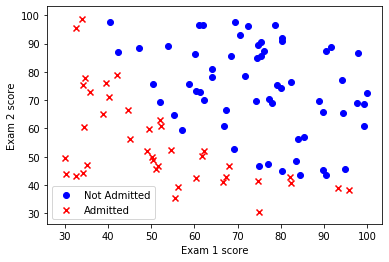

[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95445795]
 [80.19018075 44.82162893]
 [93.1143888  38.80067034]
 [61.83020602 50.25610789]
 [38.7858038  64.99568096]
 [61.37928945 72.80788731]
 [85.40451939 57.05198398]
 [52.10797973 63.12762377]
 [52.04540477 69.43286012]
 [40.23689374 71.16774802]
 [54.63510555 52.21388588]
 [33.91550011 98.86943574]
 

AttributeError: module 'utils' has no attribute 'plotDecisionBoundary'

In [3]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize
from pylab import scatter,show,legend,xlabel,ylabel
import utils
%matplotlib inline
data=np.loadtxt('ex2data1.txt',delimiter=',')
X=data[:,0:2]
y=data[:,2]
def plotData(X,y):
    """
    fig=pyplot.figure()
    pos=y==1
    neg=y==0
    pyplot.plot(X[pos,0],X[pos,1],marker='o',c='b')
    pyplot.plot(X[neg,0],X[neg,1],marker='x',c='r')
    pyplot.xlabel("Exam1 marks: ")
    pyplot.ylabel("Exam2 marks: ")
    """
    pos=y==1
    neg=y==0
    scatter(X[pos,0],X[pos,1],marker='o',c='b')
    scatter(X[neg,0],X[neg,1],marker='x',c='r')
    xlabel('Exam 1 score')
    ylabel('Exam 2 score')
    legend(['Not Admitted','Admitted'])
    show()
plotData(X,y)
m,n=X.shape
print(X)
def sigmoid(z):
    z=np.array(z)
    g=np.zeros(z.shape)
    g=1/(1+np.exp(-z))
    return g
def normalize(X):
    mu=np.ones((0,X.shape[1]))
    sigma=np.ones((0,X.shape[1]))
    sigma=np.std(X,axis=0)
    mu=np.mean(X,axis=0)
    print(sigma)
    print(mu)
    Xres=(X-mu)/sigma
    m=y.shape[0]
    print(Xres)
    return mu,sigma,Xres

mu,sigma,X=normalize(X)
X=np.concatenate((np.ones((m,1)),X),axis=1)

def costFunction(theta,X,y):
    j=0
    m=y.size
    y=y.copy()
    #print(theta.shape)
    #np.reshape(theta,(1,3))
    grad=np.zeros(theta.shape)
    h=sigmoid(np.dot(X,theta))
    #print(h)
    j=(1/m)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))
    #print(j)
    grad=(1/m)*(h-y).dot(X)
    #print(grad)
    #print(" ")
    return j,grad
initial_theta=np.zeros((3,1))
print(initial_theta.shape)
print(X.shape)
#h=sigmoid(np.dot(X,theta))
#print(h)
options={'maxiter':400}
res=optimize.minimize(costFunction,initial_theta,(X,y),jac=True,method='TNC',options=options)
cost=res.fun
theta=res.x
print("optimised cost: ",cost)
print("optimised theta: ",theta)
pos=y==1
neg=y==0
optimiseboundary=(-1*(theta[0]+theta[1]*X[:,1:2]))/theta[2]
#utils.plotDecisionBoundary(plotData,theta,X,y)





In [120]:
pip install utils

Note: you may need to restart the kernel to use updated packages.
